In [1]:
import os
import PIL
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
import matplotlib.pyplot as plt
from ML.recognition import face_recog
import pandas as pd

In [2]:
def get_bytes(image):
    f = open(image, 'rb')
    image_bytes = f.read()
    return image_bytes

In [3]:
def face_recognition(img_path:bytes, name_img:str = "Ronaldo"):
    # img = cv2.imread(img_path)
    img = cv2.imdecode(np.frombuffer(img_path, np.uint8), cv2.COLOR_BGR2GRAY)
    
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    embedder = FaceNet()
    f = []
    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        faces = img[y:y + h, x:x + w]
        im_res = cv2.resize(faces, (128,128), interpolation = cv2.INTER_AREA)
        detections = embedder.embeddings(im_res.reshape(-1, 128, 128, 3))
        f.append(detections)
#         plt.imshow(im_res)
#         plt.show()
    if f == []:
        msg = "no face detected"
    elif len(f)>1:
        msg = "more than one face is detected"
    else:
        msg = "face has been registered"

    return msg, f

In [4]:
images_byt = []
labels = []
name_imgs=[]

for label in os.listdir("data"):
    for i in os.listdir(os.path.join("data", label)):
        name_imgs.append(os.path.join("data/"+label, i))
        byt = get_bytes(os.path.join("data/"+label, i))
        images_byt.append(byt)
        labels.append(label)

In [5]:
from database.write_to_data import load_data
database = load_data()

In [6]:
face_recog(images_byt[0], database)

FACES : [[433 141  53  53]]
1/1 [==============================] - 3s 3s/step


(0.0, 'Chica Amatayakul')

In [7]:
labels[0]

'chica amatayakul'

In [8]:
predict_ = []
for key,val in enumerate(images_byt):
    dist, pred = face_recog(val, database)
    print(name_imgs[key])
    print("True Label : {}\nPredict Label :{}\n".format(labels[key], pred))
    predict_.append(pred)

FACES : [[433 141  53  53]]
1/1 [==============================] - 0s 101ms/step
data/chica amatayakul\43818003-190136478553940-6412314285764865238-n-9c18878047a4844af182715bbf830311.jpg
True Label : chica amatayakul
Predict Label :Chica Amatayakul

FACES : [[209 368  35  35]]
1/1 [==============================] - 0s 98ms/step
data/chica amatayakul\46382206-206688650215125-6879519300271295733-n-13e49b47fa8df43eee772f38fb02b9d2.jpg
True Label : chica amatayakul
Predict Label :Chica Amatayakul

FACES : [[192 316 549 549]]
1/1 [==============================] - 0s 115ms/step
data/chica amatayakul\66zk2_5f.jpg
True Label : chica amatayakul
Predict Label :Chica Amatayakul

FACES : [[ 53 641  59  59]]
1/1 [==============================] - 0s 130ms/step
data/chica amatayakul\Biodata dan Profil Kitty Chicha Amatayakul 1.jpg
True Label : chica amatayakul
Predict Label :Chica Amatayakul

FACES : [[496 322  66  66]]
1/1 [==============================] - 0s 92ms/step
data/chica amatayakul\fa2ce

In [9]:
df_res = pd.DataFrame({
    "Image":name_imgs,
    "True":labels,
    "Pred":predict_
})
df_res

Image              True  \
0   data/chica amatayakul\43818003-190136478553940...  chica amatayakul   
1   data/chica amatayakul\46382206-206688650215125...  chica amatayakul   
2                  data/chica amatayakul\66zk2_5f.jpg  chica amatayakul   
3   data/chica amatayakul\Biodata dan Profil Kitty...  chica amatayakul   
4   data/chica amatayakul\fa2cef4def2cc1880700470a...  chica amatayakul   
5                   data/jefri nichol\1347123643.jpeg      jefri nichol   
6                    data/jefri nichol\1537253728.jpg      jefri nichol   
7                    data/jefri nichol\2745459427.jpg      jefri nichol   
8            data/jefri nichol\jefri-nichol-1_43.jpeg      jefri nichol   
9                     data/jefri nichol\_vertical.jpg      jefri nichol   
10                    data/manny pacquiao\images.jfif    manny pacquiao   
11             data/manny pacquiao\manny-pacquiao.jpg    manny pacquiao   
12        data/manny pacquiao\Manny_Pacquiao_2010.jpg    manny pacquiao   
13           data/manny pacquiao\Ne2YxJMv_400x400.jpg    manny pacquiao   
14  data/manny pacquiao\sosok-manny-pacquiao-legen...    manny pacquiao   
15        data/ryu hye young\170418_특별시민_라이브톡_류혜영.jpg     ryu hye young   
16  data/ryu hye young\176994326-452568559367553-7...     ryu hye young   
17        data/ryu hye young\1_RxkQXGv.width-1000.jpg     ryu hye young   
18  data/ryu hye young\fromandroid-279f80a51537078...     ryu hye young   
19            data/ryu hye young\Ryu-Hye-Young-12.jpg     ryu hye young   
20           data/ryu hye young\RyuHyeYoung_6-min.jpg     ryu hye young   
21  data/taufik hidayat\1643508-taufik-hidayat-780...    taufik hidayat   
22  data/taufik hidayat\5-rekor-dunia-taufik-hiday...    taufik hidayat   
23  data/taufik hidayat\511010fd-73f1-45ec-811d-7e...    taufik hidayat   
24              data/taufik hidayat\610bc05a9120b.jpg    taufik hidayat   
25                    data/taufik hidayat\8077338.jpg    taufik hidayat   

                              Pred  
0                 Chica Amatayakul  
1                 Chica Amatayakul  
2                 Chica Amatayakul  
3                 Chica Amatayakul  
4                 Chica Amatayakul  
5                 Chica Amatayakul  
6                     Jefri Nichol  
7                     Jefri Nichol  
8                     Jefri Nichol  
9                     Jefri Nichol  
10                  Manny Pacquiao  
11                  Manny Pacquiao  
12                  Manny Pacquiao  
13                  Manny Pacquiao  
14                  Manny Pacquiao  
15                   Ryu Hye Young  
16                Chica Amatayakul  
17                   Ryu Hye Young  
18  more than one face is detected  
19                no face detected  
20                   Ryu Hye Young  
21                no face detected  
22                  Taufik Hidayat  
23                  Taufik Hidayat  
24                  Taufik Hidayat  
25                  Taufik Hidayat

In [10]:
df_res["Pred"] = df_res["Pred"].str.lower()

In [11]:
df_res

Image              True  \
0   data/chica amatayakul\43818003-190136478553940...  chica amatayakul   
1   data/chica amatayakul\46382206-206688650215125...  chica amatayakul   
2                  data/chica amatayakul\66zk2_5f.jpg  chica amatayakul   
3   data/chica amatayakul\Biodata dan Profil Kitty...  chica amatayakul   
4   data/chica amatayakul\fa2cef4def2cc1880700470a...  chica amatayakul   
5                   data/jefri nichol\1347123643.jpeg      jefri nichol   
6                    data/jefri nichol\1537253728.jpg      jefri nichol   
7                    data/jefri nichol\2745459427.jpg      jefri nichol   
8            data/jefri nichol\jefri-nichol-1_43.jpeg      jefri nichol   
9                     data/jefri nichol\_vertical.jpg      jefri nichol   
10                    data/manny pacquiao\images.jfif    manny pacquiao   
11             data/manny pacquiao\manny-pacquiao.jpg    manny pacquiao   
12        data/manny pacquiao\Manny_Pacquiao_2010.jpg    manny pacquiao   
13           data/manny pacquiao\Ne2YxJMv_400x400.jpg    manny pacquiao   
14  data/manny pacquiao\sosok-manny-pacquiao-legen...    manny pacquiao   
15        data/ryu hye young\170418_특별시민_라이브톡_류혜영.jpg     ryu hye young   
16  data/ryu hye young\176994326-452568559367553-7...     ryu hye young   
17        data/ryu hye young\1_RxkQXGv.width-1000.jpg     ryu hye young   
18  data/ryu hye young\fromandroid-279f80a51537078...     ryu hye young   
19            data/ryu hye young\Ryu-Hye-Young-12.jpg     ryu hye young   
20           data/ryu hye young\RyuHyeYoung_6-min.jpg     ryu hye young   
21  data/taufik hidayat\1643508-taufik-hidayat-780...    taufik hidayat   
22  data/taufik hidayat\5-rekor-dunia-taufik-hiday...    taufik hidayat   
23  data/taufik hidayat\511010fd-73f1-45ec-811d-7e...    taufik hidayat   
24              data/taufik hidayat\610bc05a9120b.jpg    taufik hidayat   
25                    data/taufik hidayat\8077338.jpg    taufik hidayat   

                              Pred  
0                 chica amatayakul  
1                 chica amatayakul  
2                 chica amatayakul  
3                 chica amatayakul  
4                 chica amatayakul  
5                 chica amatayakul  
6                     jefri nichol  
7                     jefri nichol  
8                     jefri nichol  
9                     jefri nichol  
10                  manny pacquiao  
11                  manny pacquiao  
12                  manny pacquiao  
13                  manny pacquiao  
14                  manny pacquiao  
15                   ryu hye young  
16                chica amatayakul  
17                   ryu hye young  
18  more than one face is detected  
19                no face detected  
20                   ryu hye young  
21                no face detected  
22                  taufik hidayat  
23                  taufik hidayat  
24                  taufik hidayat  
25                  taufik hidayat

In [29]:
df_res[df_res["True"] == "ryu hye young"]

Image           True  \
15        data/ryu hye young\170418_특별시민_라이브톡_류혜영.jpg  ryu hye young   
16  data/ryu hye young\176994326-452568559367553-7...  ryu hye young   
17        data/ryu hye young\1_RxkQXGv.width-1000.jpg  ryu hye young   
18  data/ryu hye young\fromandroid-279f80a51537078...  ryu hye young   
19            data/ryu hye young\Ryu-Hye-Young-12.jpg  ryu hye young   
20           data/ryu hye young\RyuHyeYoung_6-min.jpg  ryu hye young   

                              Pred  
15                   ryu hye young  
16                chica amatayakul  
17                   ryu hye young  
18  more than one face is detected  
19                no face detected  
20                   ryu hye young

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, accuracy_score, f1_score

In [13]:
x = df_res["Pred"].values
y = df_res["True"].values

In [14]:
confusion_matrix(y,x)

array([[5, 0, 0, 0, 0, 0, 0],
       [1, 4, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 3, 0],
       [0, 0, 0, 0, 1, 0, 4]], dtype=int64)

In [15]:
print(classification_report(y, x))

                                precision    recall  f1-score   support

              chica amatayakul       0.71      1.00      0.83         5
                  jefri nichol       1.00      0.80      0.89         5
                manny pacquiao       1.00      1.00      1.00         5
more than one face is detected       0.00      0.00      0.00         0
              no face detected       0.00      0.00      0.00         0
                 ryu hye young       1.00      0.50      0.67         6
                taufik hidayat       1.00      0.80      0.89         5

                      accuracy                           0.81        26
                     macro avg       0.67      0.59      0.61        26
                  weighted avg       0.95      0.81      0.85        26



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print(f1_score(y,x,average="micro"))
print(f1_score(y,x,average="macro"))
print(f1_score(y,x,average="weighted"))

0.8076923076923077
0.611111111111111
0.8482905982905984


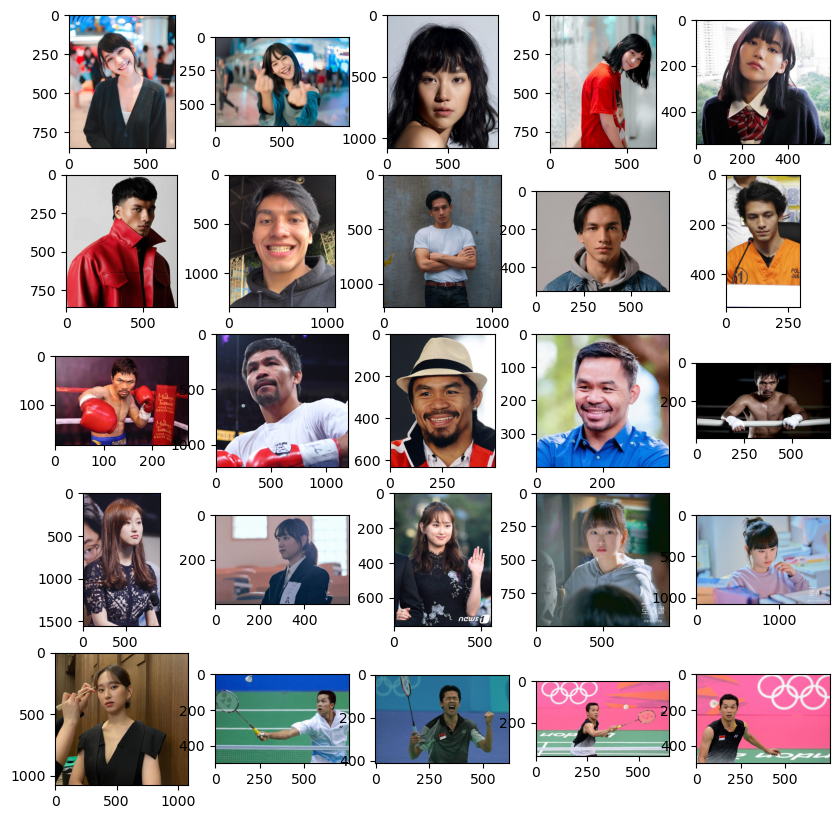

In [26]:
rows=5
cols = 5
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10,10))

for i in range(rows):
    for j in range(cols):        
        if img_count < len(name_imgs):
            axes[i, j].imshow(PIL.Image.open(name_imgs[img_count]))
            img_count+=1

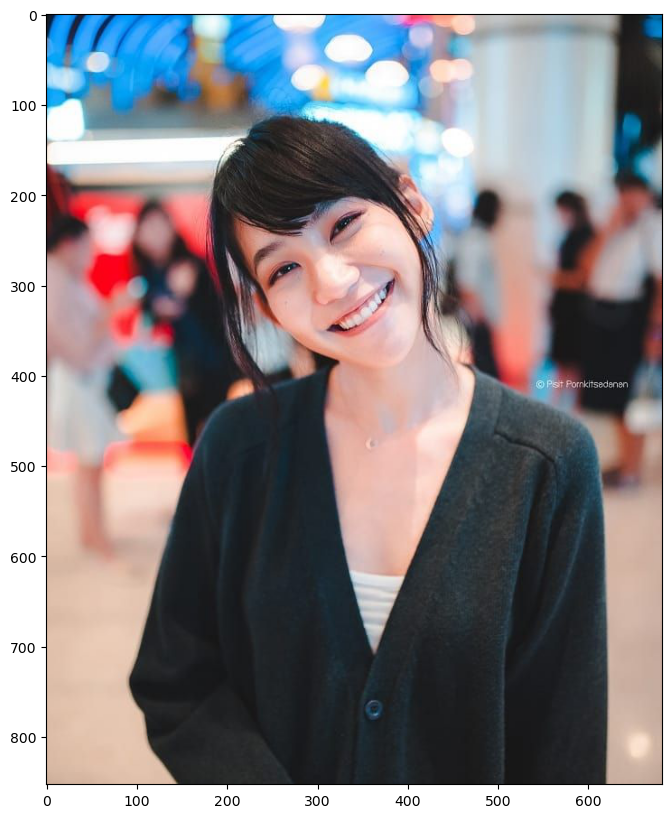

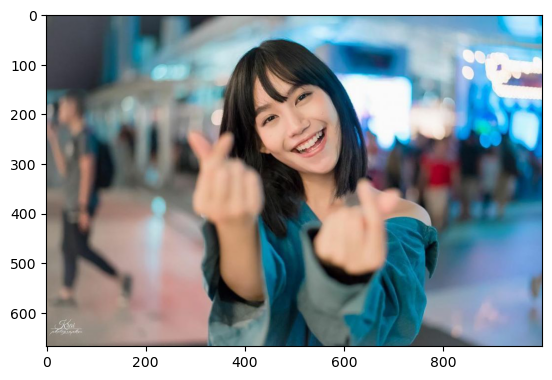

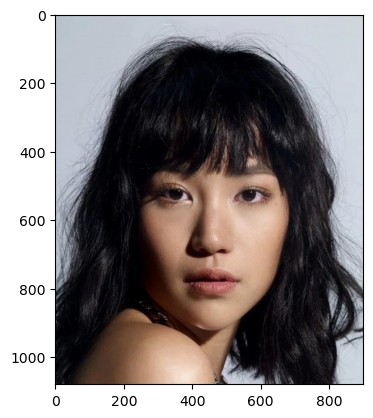

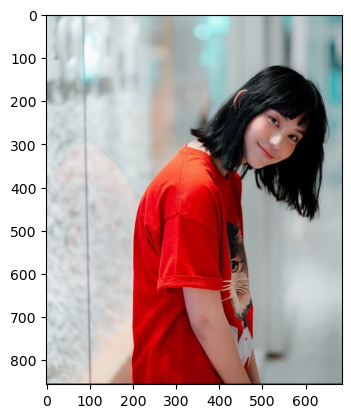

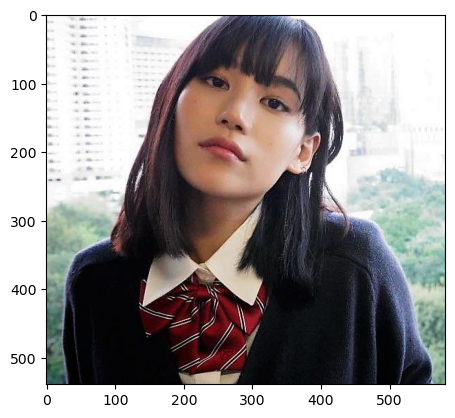

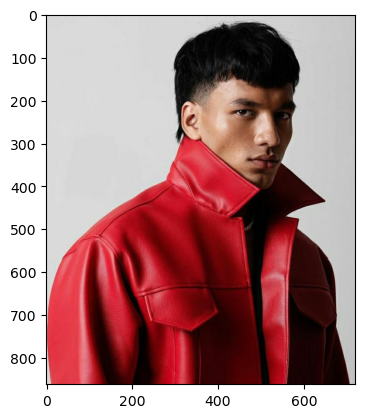

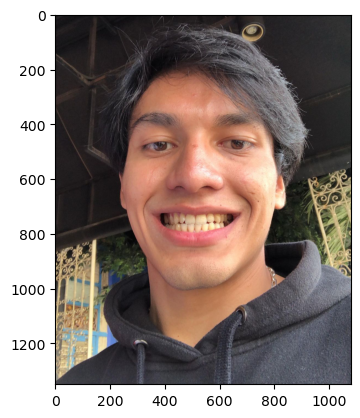

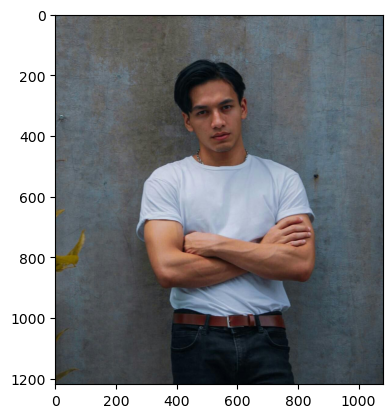

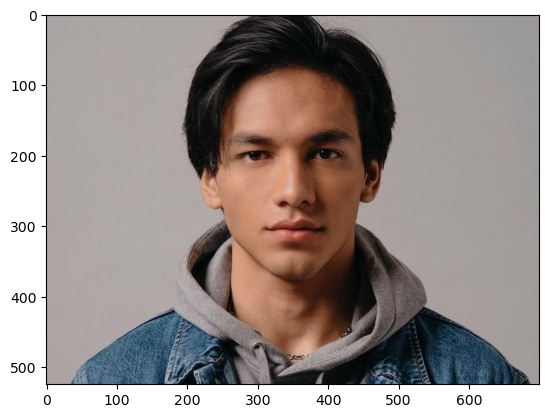

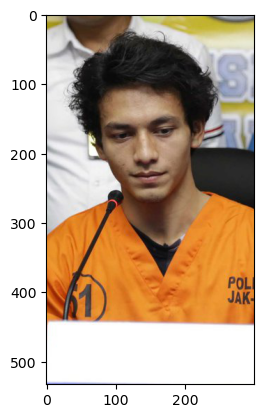

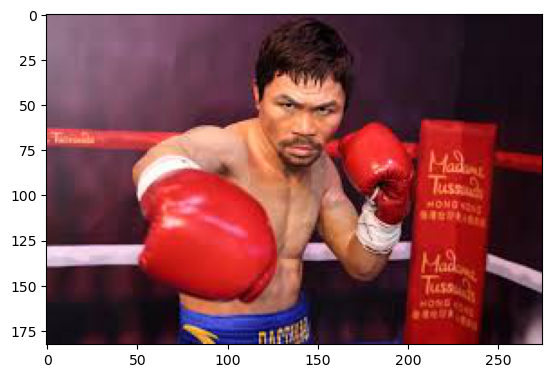

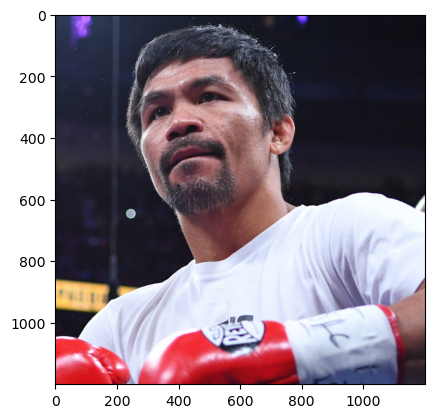

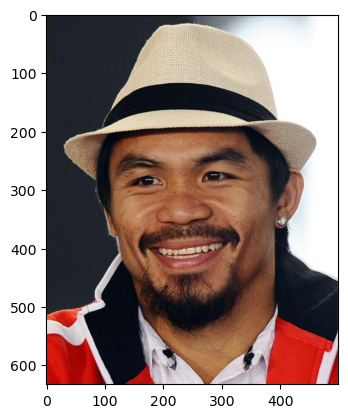

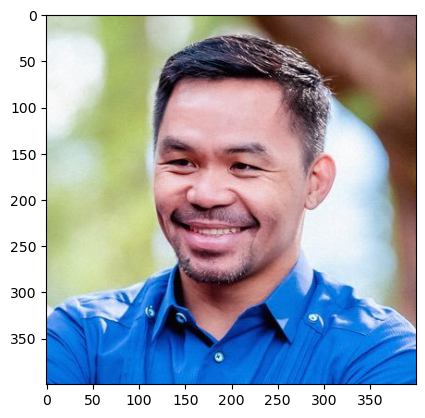

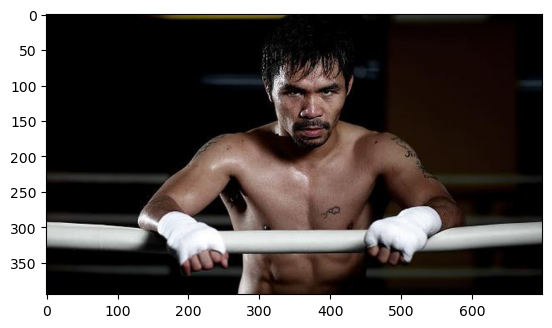

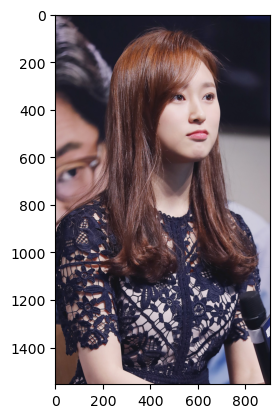

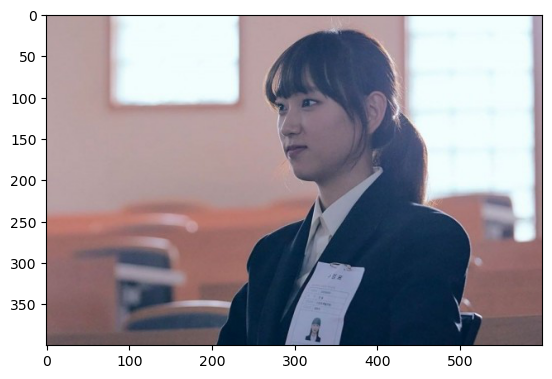

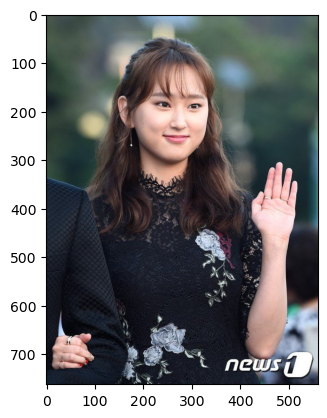

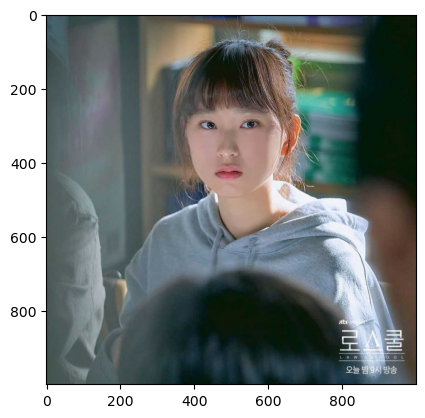

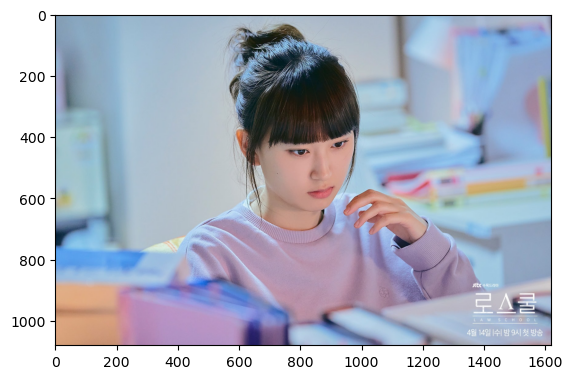

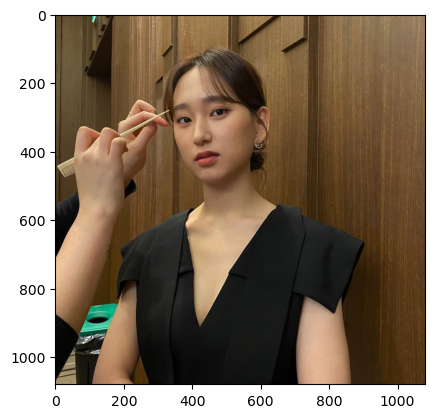

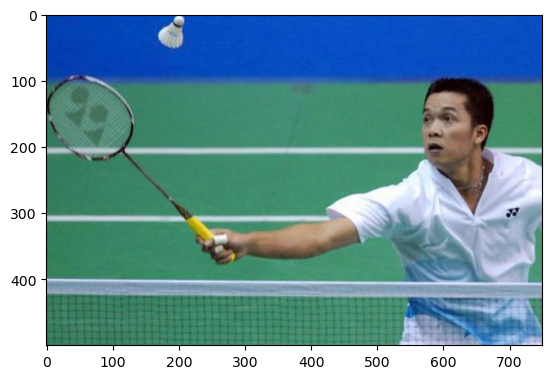

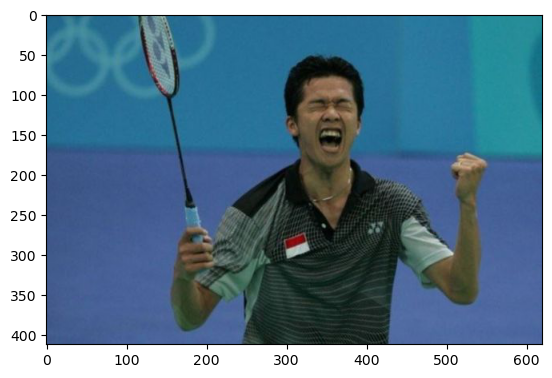

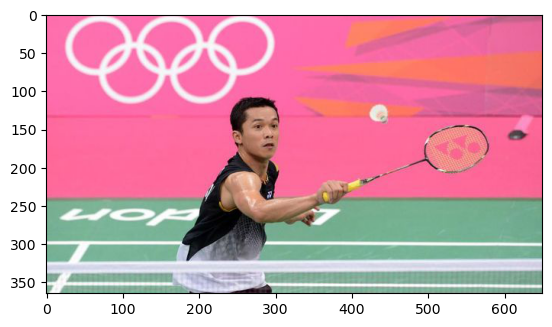

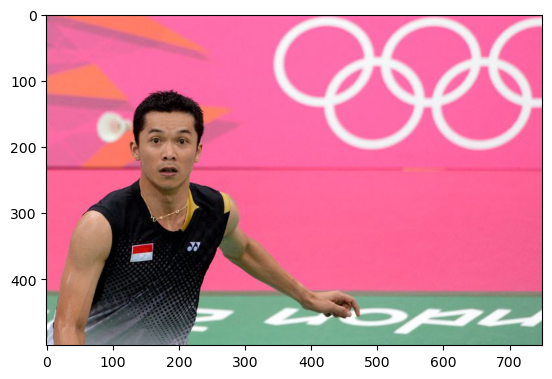

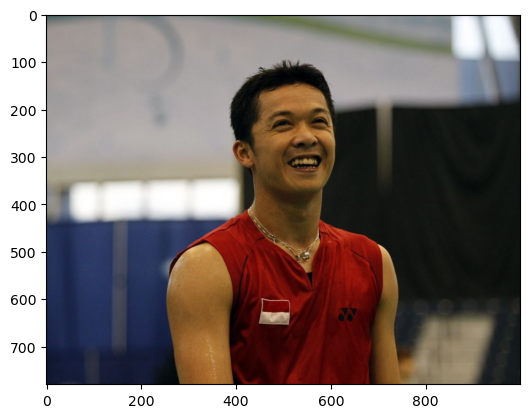

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in name_imgs:
    imag = PIL.Image.open(i)
    plt.imshow(imag)
    plt.show()
    